<a href="https://colab.research.google.com/github/tillaczel/Machine-learning-workshop/blob/master/MNIST_fashion_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST fashion exercise
This is a tutorial for the basics of neural network hyperparameters. The task is to achieve high accuracy on the MNIST fashion dataset.

## Reference
This tutorial was built upon the official tensorflow fashion tutorial (https://www.tensorflow.org/tutorials/keras/classification).

## Installing and imoprting libraries
Upgrading to tensorflow 2.0.

In [1]:
!pip install tensorflow --upgrade

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.0.0)


Importing keras, numpy, and pyplot.

In [0]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

## Data preparation
Importing MNIST from keras.

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Printing out data shape and visualizing the first train input.

Train x shape: (60000, 28, 28)
Train y shape: (60000,)
Test x shape: (10000, 28, 28)
Test y shape: (10000,)


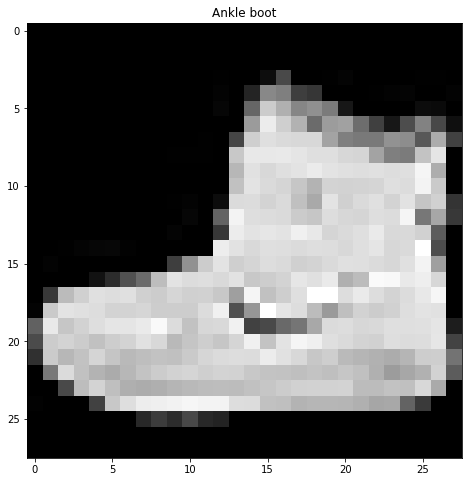

In [4]:
print(f'Train x shape: {x_train.shape}')
print(f'Train y shape: {y_train.shape}')
print(f'Test x shape: {x_test.shape}')
print(f'Test y shape: {y_test.shape}')

fig = plt.figure(figsize=(8,8))
plt.imshow(x_train[0], cmap='gray')
plt.title(class_names[y_train[0]])
plt.show()

Normalising data.

In [5]:
print(f'Min train x: {np.min(x_train)}')
print(f'Max train x: {np.max(x_train)}')

x_train_norm, x_test_norm,= x_train/255, x_test/255
print(f'Min normalised train x: {np.min(x_train_norm)}')
print(f'Max normalised train x: {np.max(x_train_norm)}')

Min train x: 0
Max train x: 255
Min normalised train x: 0.0
Max normalised train x: 1.0


The Conv2D layer requires 4D input data (batch, rows, cols, channels). The inputs need to be reshaped.

In [6]:
# x_train_norm, x_test_norm = x_train_norm[:, :, :, np.newaxis], x_test_norm[:, :, :, np.newaxis]
# print(f'New shape of training data: {x_train_norm.shape}')

New shape of training data: (60000, 28, 28, 1)


## Task: building and training the neural network

Complete the build_model() function!

In [0]:
def build_model(x_train_norm, y_train, x_test_norm, y_test):


    return model, history

In [10]:
model, history = build_model(x_train_norm, y_train, x_test_norm, y_test)

Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 153s 3ms/sample - loss: 0.4789 - accuracy: 0.8291 - val_loss: 0.3637 - val_accuracy: 0.8722


## Visualizing results
First lets visualize the train and validation loss function. If the slope of the loss function is big, the model needs to be trained for more epochs. If the validation loss is much higher than the train loss, then the model overfit the dataset.

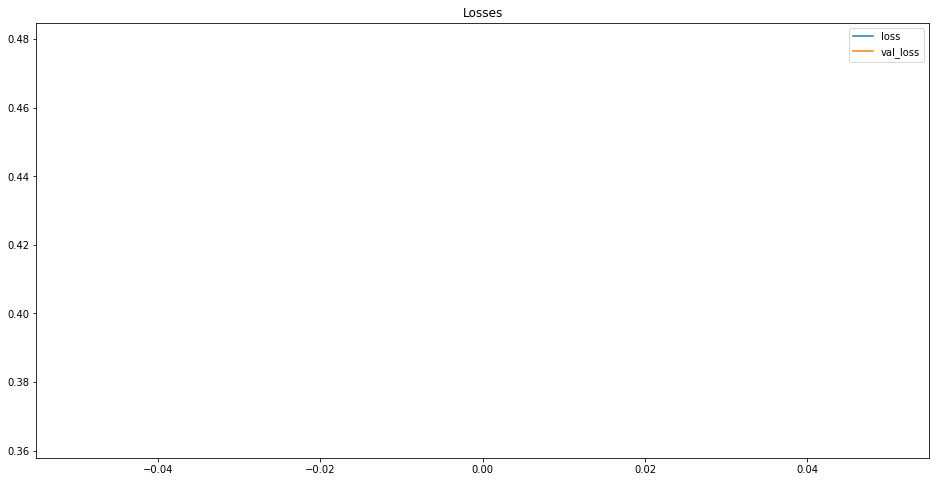

In [11]:
fig = plt.figure(figsize=(16,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Losses')
plt.show()

The accuracy showes the percentage of correctly labeld pictures.

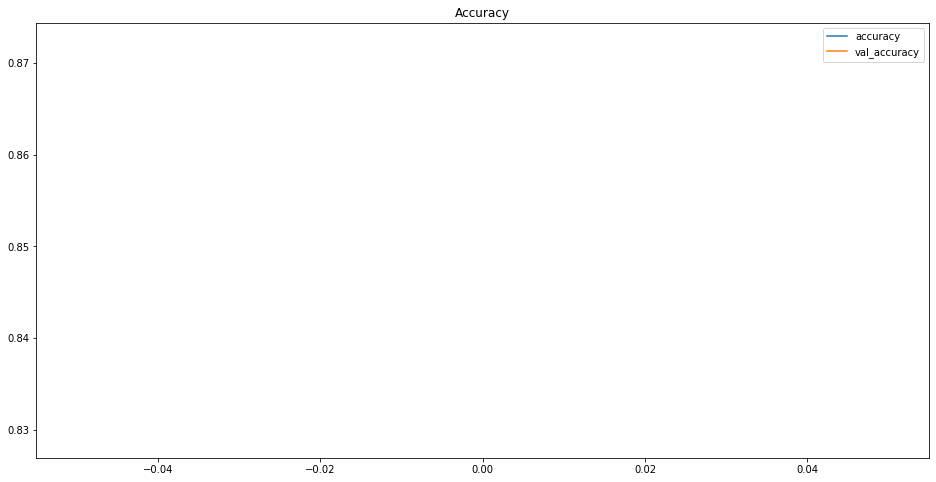

In [12]:
fig = plt.figure(figsize=(16,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.show()

Lets plot the first 100 samples of the validation set, with their predictions.

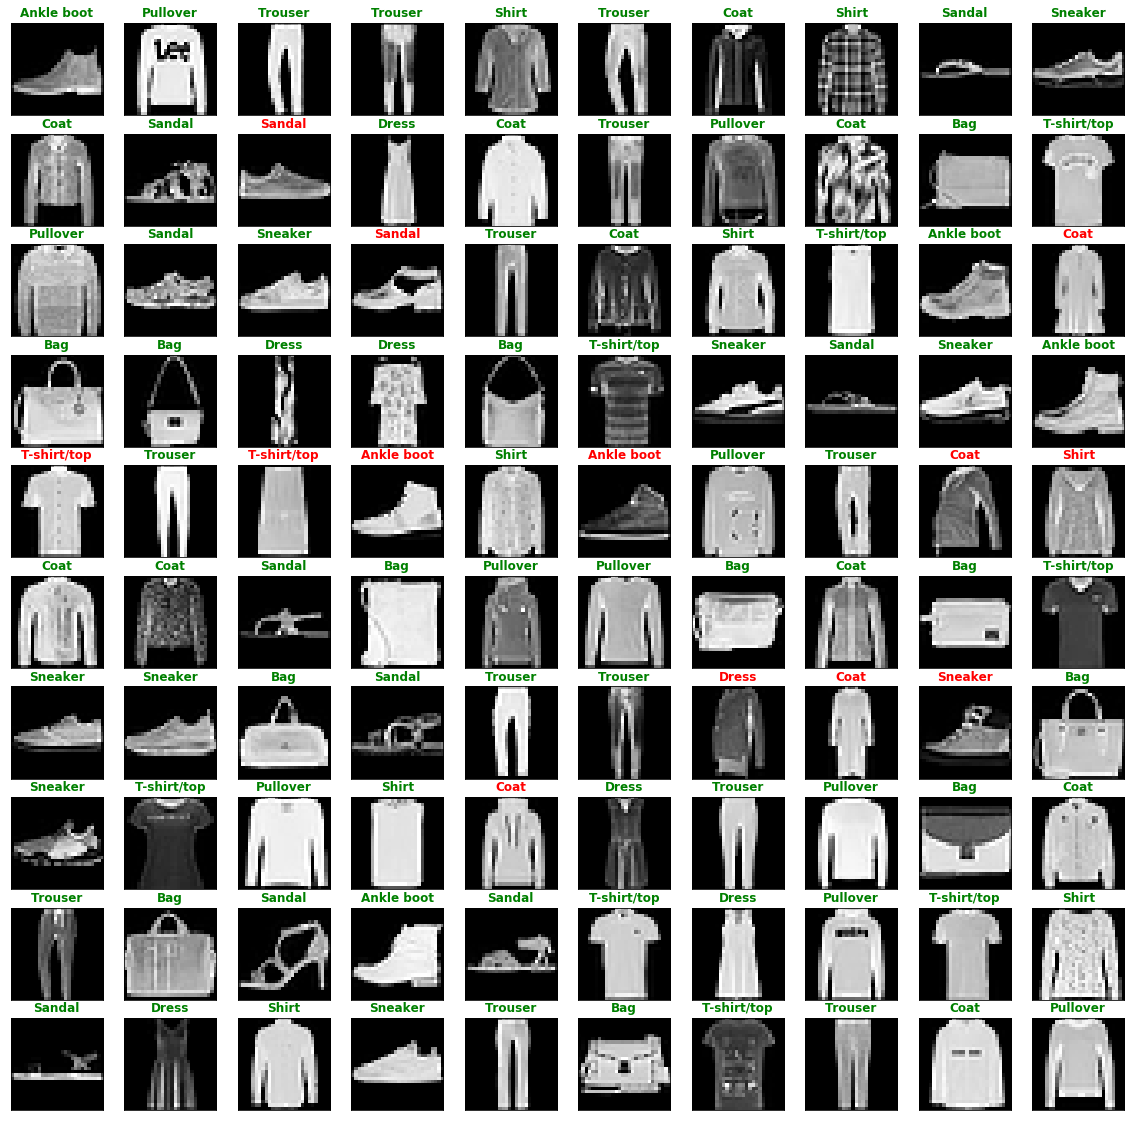

In [17]:
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test_norm[i], cmap='gray')
    # plt.imshow(x_test_norm[i][:, :, 0], cmap='gray')
    prediction = np.argmax(model.predict(x_test_norm[i, np.newaxis]))
    title_obj = plt.title(class_names[prediction], fontweight="bold")
    if prediction == y_test[i]:
      plt.setp(title_obj, color='g')
    else:
      plt.setp(title_obj, color='r')
plt.show()